Text(8.7, 3.3, 'Goles vs Jugadoras cercanas')

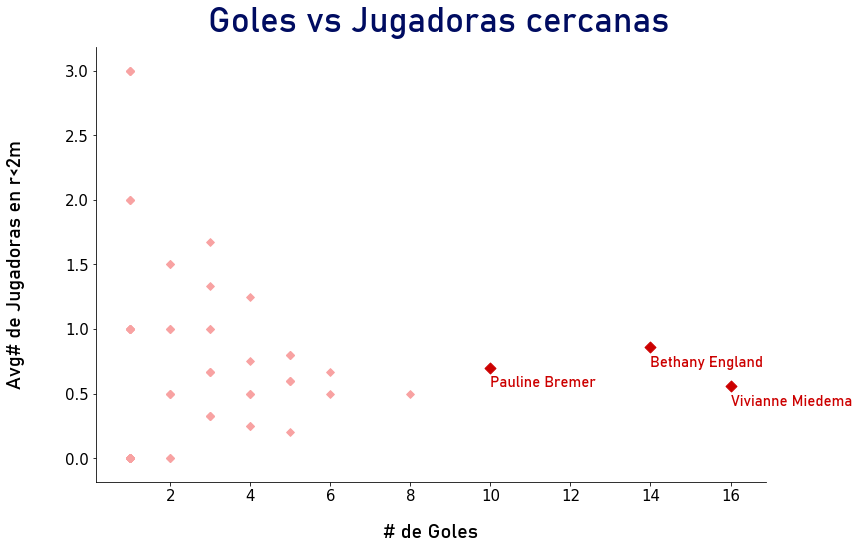

In [425]:
import pandas as pd
import math

#necesitamos una tabla con todos los goles marcados
dfpartidos=pd.read_json('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/37/42.json')
listapartidos=dfpartidos['match_id'].tolist()
filenames=[]
for i in listapartidos:
    filenames.append(pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/events/'+str(i)+'.json'))
    dfeventos = pd.concat(filenames, ignore_index=True,sort=True)
    #Nos quedamos solo con los tiros para sacar los goles
dftiros=dfeventos.loc[dfeventos['type']=={'id': 16, 'name': 'Shot'}].dropna(axis=1)
dftiros.drop(columns=['id','type','duration','minute','period','position','possession','possession_team','related_events','second','team','timestamp'], inplace=True)
dfshotexpand= pd.DataFrame(dftiros['shot'].values.tolist())
    
    #Añadimos una columna a cada dataframe para que nos sirva de índice para el merge
dfshotexpand['union']=range(len(dftiros))
dftiros['union']=range(len(dftiros))
    
    #Unimos los dataframes para quedarnos con uno que incluya la localización del tiro
dfcontiros=pd.merge(dfshotexpand, dftiros, how='outer', on='union')
dfcontiros.drop(columns=['end_location','technique','body_part','shot','statsbomb_xg','key_pass_id','first_time','open_goal','one_on_one','aerial_won','deflected','follows_dribble','saved_off_target','saved_to_post','redirect'], inplace=True)
dfgoles=dfcontiros.loc[(dfcontiros['outcome']=={'id': 97, 'name': 'Goal'}) & (dfcontiros['type']=={'id': 87, 'name': 'Open Play'})]
dfgoles=dfgoles.drop(columns=['outcome','type','play_pattern'])

dfcontiros=pd.merge(dfshotexpand, dftiros, how='outer', on='union')
dfcontiros.drop(columns=['end_location','technique','body_part','shot','statsbomb_xg','key_pass_id','first_time','open_goal','one_on_one','aerial_won','deflected','follows_dribble','saved_off_target','saved_to_post','redirect'], inplace=True)
dfgoles=dfcontiros.loc[(dfcontiros['outcome']=={'id': 97, 'name': 'Goal'}) & (dfcontiros['type']=={'id': 87, 'name': 'Open Play'})]
dfgoles=dfgoles.drop(columns=['outcome','type','play_pattern'])

dfff= pd.DataFrame(dfgoles['freeze_frame'].values.tolist())
dfff.rename(columns={0: 'jug1', 1: 'jug2',2: 'jug3',3:'jug4',4:'jug5',5:'jug6',6:'jug7',7:'jug8',8:'jug9',9:'jug10',10:'jug11',11:'jug12',12:'jug13',13:'jug14',14:'jug15',15:'jug16',16:'jug17',17:'jug18',18:'jug19',19:'jug20'},inplace=True)

from pandas import isnull
dfff=dfff.applymap(lambda x: {'location':[0.0,0.0],'player':{'id':1,'name':'Nadie'},'position':{'id':1,'name':'ninguna'},'teammate':False} if isnull(x) else x)

dfjug1=pd.DataFrame(dfff['jug1'].values.tolist())
dfjug1.rename(columns={'location': 'loc1','player': 'pl1','position': 'pos1','teammate': 't1'},inplace=True)
dfconjug1=pd.concat([dfjug1,dfff],axis=1).drop(columns=['jug1'])

dfjug2=pd.DataFrame(dfff['jug2'].values.tolist())
dfjug2.rename(columns={'location': 'loc2','player': 'pl2','position': 'pos2','teammate': 't2'},inplace=True)
dfconjug2=pd.concat([dfconjug1,dfjug2],axis=1).drop(columns=['jug2'])

dfjug3=pd.DataFrame(dfff['jug3'].values.tolist())
dfjug3.rename(columns={'location': 'loc3','player': 'pl3','position': 'pos3','teammate': 't3'},inplace=True)
dfconjug3=pd.concat([dfconjug2,dfjug3],axis=1).drop(columns=['jug3'])

dfjug4=pd.DataFrame(dfff['jug4'].values.tolist())
dfjug4.rename(columns={'location': 'loc4','player': 'pl4','position': 'pos4','teammate': 't4'},inplace=True)
dfconjug4=pd.concat([dfconjug3,dfjug4],axis=1).drop(columns=['jug4'])

dfjug5=pd.DataFrame(dfff['jug5'].values.tolist())
dfjug5.rename(columns={'location': 'loc5','player': 'pl5','position': 'pos5','teammate': 't5'},inplace=True)
dfconjug5=pd.concat([dfconjug4,dfjug5],axis=1).drop(columns=['jug5'])

dfjug6=pd.DataFrame(dfff['jug6'].values.tolist())
dfjug6.rename(columns={'location': 'loc6','player': 'pl6','position': 'pos6','teammate': 't6'},inplace=True)
dfconjug6=pd.concat([dfconjug5,dfjug6],axis=1).drop(columns=['jug6'])

dfjug7=pd.DataFrame(dfff['jug7'].values.tolist())
dfjug7.rename(columns={'location': 'loc7','player': 'pl7','position': 'pos7','teammate': 't7'},inplace=True)
dfconjug7=pd.concat([dfconjug6,dfjug7],axis=1).drop(columns=['jug7'])

dfjug8=pd.DataFrame(dfff['jug8'].values.tolist())
dfjug8.rename(columns={'location': 'loc8','player': 'pl8','position': 'pos8','teammate': 't8'},inplace=True)
dfconjug8=pd.concat([dfconjug7,dfjug8],axis=1).drop(columns=['jug8'])

dfjug9=pd.DataFrame(dfff['jug9'].values.tolist())
dfjug9.rename(columns={'location': 'loc9','player': 'pl9','position': 'pos9','teammate': 't9'},inplace=True)
dfconjug9=pd.concat([dfconjug8,dfjug9],axis=1).drop(columns=['jug9'])

dfjug10=pd.DataFrame(dfff['jug10'].values.tolist())
dfjug10.rename(columns={'location': 'loc10','player': 'pl10','position': 'pos10','teammate': 't10'},inplace=True)
dfconjug10=pd.concat([dfconjug9,dfjug10],axis=1).drop(columns=['jug10'])

dfjug11=pd.DataFrame(dfff['jug11'].values.tolist())
dfjug11.rename(columns={'location': 'loc11','player': 'pl11','position': 'pos11','teammate': 't11'},inplace=True)
dfconjug11=pd.concat([dfconjug10,dfjug11],axis=1).drop(columns=['jug11'])

dfjug12=pd.DataFrame(dfff['jug12'].values.tolist())
dfjug12.rename(columns={'location': 'loc12','player': 'pl12','position': 'pos12','teammate': 't12'},inplace=True)
dfconjug12=pd.concat([dfconjug11,dfjug12],axis=1).drop(columns=['jug12'])

dfjug13=pd.DataFrame(dfff['jug13'].values.tolist())
dfjug13.rename(columns={'location': 'loc13','player': 'pl13','position': 'pos13','teammate': 't13'},inplace=True)
dfconjug13=pd.concat([dfconjug12,dfjug13],axis=1).drop(columns=['jug13'])

dfjug14=pd.DataFrame(dfff['jug14'].values.tolist())
dfjug14.rename(columns={'location': 'loc14','player': 'pl14','position': 'pos14','teammate': 't14'},inplace=True)
dfconjug14=pd.concat([dfconjug13,dfjug14],axis=1).drop(columns=['jug14'])

dfjug15=pd.DataFrame(dfff['jug15'].values.tolist())
dfjug15.rename(columns={'location': 'loc15','player': 'pl15','position': 'pos15','teammate': 't15'},inplace=True)
dfconjug15=pd.concat([dfconjug14,dfjug15],axis=1).drop(columns=['jug15'])

dfjug16=pd.DataFrame(dfff['jug16'].values.tolist())
dfjug16.rename(columns={'location': 'loc16','player': 'pl16','position': 'pos16','teammate': 't16'},inplace=True)
dfconjug16=pd.concat([dfconjug15,dfjug16],axis=1).drop(columns=['jug16'])

dfjug17=pd.DataFrame(dfff['jug17'].values.tolist())
dfjug17.rename(columns={'location': 'loc17','player': 'pl17','position': 'pos17','teammate': 't17'},inplace=True)
dfconjug17=pd.concat([dfconjug16,dfjug17],axis=1).drop(columns=['jug17'])

dfjug18=pd.DataFrame(dfff['jug18'].values.tolist())
dfjug18.rename(columns={'location': 'loc18','player': 'pl18','position': 'pos18','teammate': 't18'},inplace=True)
dfconjug18=pd.concat([dfconjug17,dfjug18],axis=1).drop(columns=['jug18'])

dfjug19=pd.DataFrame(dfff['jug19'].values.tolist())
dfjug19.rename(columns={'location': 'loc19','player': 'pl19','position': 'pos19','teammate': 't19'},inplace=True)
dfconjug19=pd.concat([dfconjug18,dfjug19],axis=1).drop(columns=['jug19'])

dfjug20=pd.DataFrame(dfff['jug20'].values.tolist())
dfjug20.rename(columns={'location': 'loc20','player': 'pl20','position': 'pos20','teammate': 't20'},inplace=True)
dfposiciones=pd.concat([dfconjug19,dfjug20],axis=1).drop(columns=['jug20'])

dfgoles.drop(columns=['freeze_frame'],inplace=True)

dfplayerexpand= pd.DataFrame(dfgoles['player'].values.tolist())
dfplayerexpand.drop(columns=['id'],inplace=True)
    
dfplayerexpand.reset_index(drop=True, inplace=True)
dfgoles.reset_index(drop=True, inplace=True)

dftodo = pd.concat([dfplayerexpand, dfgoles], axis=1) 

dftodo.drop(columns=['index','player'],inplace=True)

dfposiciones.reset_index(drop=True, inplace=True)
dftodo.reset_index(drop=True, inplace=True)

dfcompleto = pd.concat([dfposiciones, dftodo], axis=1) 
dfcompleto['numjugadoras']=0



for i in range(20):
    exec(f'posicionloc{i+1}=dfcompleto.columns.get_loc("loc{i+1}")')
    
for i in range(20):
    exec(f'posicionteam{i+1}=dfcompleto.columns.get_loc("t{i+1}")')
    

for i in range(len(dfcompleto)):
    #Jugadora1
    difx=(dfcompleto.iloc[i,posicionloc1][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc1][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam1]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
    #Jugadora2
    difx=(dfcompleto.iloc[i,posicionloc2][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc2][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam2]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
            #Jugadora3
    difx=(dfcompleto.iloc[i,posicionloc3][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc3][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam3]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
            #Jugadora4
    difx=(dfcompleto.iloc[i,posicionloc4][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc4][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam4]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
            #Jugadora5
    difx=(dfcompleto.iloc[i,posicionloc5][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc5][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam5]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
            #Jugadora6
    difx=(dfcompleto.iloc[i,posicionloc6][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc6][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam6]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora7
    difx=(dfcompleto.iloc[i,posicionloc7][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc7][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam7]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora8
    difx=(dfcompleto.iloc[i,posicionloc8][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc8][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam8]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora9
    difx=(dfcompleto.iloc[i,posicionloc9][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc9][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam9]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora10
    difx=(dfcompleto.iloc[i,posicionloc10][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc10][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam10]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora11
    difx=(dfcompleto.iloc[i,posicionloc11][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc11][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam11]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora12
    difx=(dfcompleto.iloc[i,posicionloc12][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc12][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam12]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora13
    difx=(dfcompleto.iloc[i,posicionloc13][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc13][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam13]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora14
    difx=(dfcompleto.iloc[i,posicionloc14][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc14][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam14]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora15
    difx=(dfcompleto.iloc[i,posicionloc15][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc15][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam15]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora16
    difx=(dfcompleto.iloc[i,posicionloc16][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc16][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam16]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora17
    difx=(dfcompleto.iloc[i,posicionloc17][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc17][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam17]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora18
    difx=(dfcompleto.iloc[i,posicionloc18][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc18][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam18]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora19
    difx=(dfcompleto.iloc[i,posicionloc19][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc19][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam19]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
        #Jugadora20
    difx=(dfcompleto.iloc[i,posicionloc20][0])-(dfcompleto.iloc[i,82][0])
    dify=(dfcompleto.iloc[i,posicionloc20][1])-(dfcompleto.iloc[i,82][1])
    sumacuadrados=difx**2+dify**2
    a=math.sqrt(sumacuadrados)
    if (a <= 2) & (dfcompleto.iloc[i,posicionteam20]==False):
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]+1
    else:
        dfcompleto.iloc[i,83]=dfcompleto.iloc[i,83]
        
dfnumero=dfcompleto[['name','numjugadoras']]

jugadoras=dfnumero.name.unique()

lista=[]
for jugadora in jugadoras:
    dfjugadora=dfnumero.loc[dfnumero['name'] == jugadora]
    golesjugadora=len(dfjugadora)
    numjugadoras=dfjugadora['numjugadoras'].sum()
    a=(jugadora,golesjugadora,numjugadoras)
    lista.append(a)
    
dfbueno=pd.DataFrame(lista,columns=['jugadora','goles','numjugadoras'])

a= round(dfbueno['numjugadoras']/dfbueno['goles'],2)
dfbueno['numjugadoras']=a

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
for i in range(len(dfbueno)):
    if (dfbueno.iloc[i,1] >= 9):
        ax.scatter(dfbueno.iloc[i,1], dfbueno.iloc[i,2], s=60, c='#CC0000', marker='D', alpha=1, linewidths=1)
        ax.text(x=dfbueno.iloc[i,1],y=dfbueno.iloc[i,2]-0.15,s="{}".format(dfbueno.iloc[i,0]),color='#CC0000', ha='left', family='bahnschrift',size = 15)
    else:
        ax.scatter(dfbueno.iloc[i,1], dfbueno.iloc[i,2], s=30, c='#F8A2A2', marker='D', alpha=1, linewidths=1)

x_axis = ax.axes.get_xaxis()
ax.set_xlabel(xlabel="# de Goles",size=20,labelpad=20, family='bahnschrift')
ax.set_ylabel(ylabel= "Avg# de Jugadoras en r<2m",size=20,labelpad=40, family='bahnschrift')
ax.tick_params(axis='both', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(8.7,3.3, s = "Goles vs Jugadoras cercanas", size = 35, color='#000C61', ha='center', family='bahnschrift')